#### Description

This section of analysis aims at optimising the on-boarding tasks using python. The following activities will be carried out specifically:

1. For each variable, create a summary statistics that tells you about the data type.
2. For each variable, use a summary metric that helps you describe the data.
3. For each variable. provide a graphical representation of the data distribution.
4. Create a new variable “average_score” represented from “math”, “reading” and “writing” scores.
5. Create another variable “average_score_cat” that categorises the “average_score” using WAEC grading system.
6. Find a relationship (if any) between each variable and the new variable “average_score_cat”.
7. Create graphical representation of the relationship(s) discovered in 6.
8. Develop an hypothesis about which variables that can help predict the “average_score_cat” of a new student.

We'll begin by attempting the first task:

##### 1. Creating a summary statistics that tells you about the data type

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# get the current directory we're in
os.getcwd()

'C:\\Users\\ADMIN\\Desktop\\Data Science Projects\\Stutern Project'

In [2]:
# Load the dataset using the full path
students_performance = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\Data Science Projects\\Stutern Project\\Dataset\\students performance data.csv')

In [3]:
# lets inspect the data set once again to refamiliarize with it
print(students_performance.shape)
students_performance.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The above output shows that there are one thousand rows and 8 columns in the `students_performance` dataset. In other words there's a total of 8 variables measured for 1000 students. Let's check for missing data:

In [4]:
students_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The above output shows that there are no missing values across the 8 variables measured for the 1000 students.  
The first Five variables are of the string types (object) or non-numeric or categorical data types, while the last three variables are of numeric (integers) datatypes.  

##### 2. Use a summary metric that helps to describe the data

Since there are different statistical techniques applied to different data types, we'll be analyzing the different variables based on their summary data types.  
For the object/categorical data types, we'll be using summary metrics such as **frequency counts**, **percentage**, **minimum** occurence in each category and **maximum** occurence in each category.  
For the numeric data types, we'll be using summary metrics such as **mean**, **standard deviation**, **mode**, **median**.

In [5]:
students_performance.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


The above output shows that there are 1000 valid entries accross all variables.  
For the categorical variables, the following were deduced:  
For the `gender` variable, there are two unique values with females having the higher representation of 518 and 482 males.  
The `race/ethnicity` variable has 5 unique values with `group C` having the highest representation of 319 students.  
The `parental level of education` variable has 6 unique values with `some college` having the highest representation of `226`.  
The `lunch` variable has 2 unique values with `standard` having the most frequency of `645`.  
The `test preparation course` variable has 2 unique values with `none` having the highest frequency of `642`

For the numeric/continuous data types or variables, the following was deduced:  
`math score` variable has a mean of approximately `66.1` and a standard deviation of `15.16`, the minimum math score is `0` while the maximum is `100`. 25% of all math scores fall below 57, 50% fall below 66, while 75% fall below 77.  
For the `reading score` variable, the mean is approximately `69.17`, the standard deviation is `14.6`, the minimun reading score is `17`, the maximum is `100`, 25% of the reading scores falls below `59`, 50% falls below `70` while 75% falls below `79`.  
Lastly, for the `writing score`, the mean is `68.1`, the standard deviation is `15.2`, the minimum is `10`, maximum is `100`, 25% writing scores falls below 57, 50% fall below 69, while 75% fall below `79`.  

Below, we'll find the percentage of unique values for the categorical variable:

In [6]:
# Percentage of values representation accross the categorical variables
print(students_performance['gender'].value_counts() / 1000 * 100, '\n')
print(students_performance['race/ethnicity'].value_counts() / 1000 * 100, '\n')
print(students_performance['parental level of education'].value_counts() / 1000 * 100, '\n')
print(students_performance['lunch'].value_counts() / 1000 * 100, '\n')
print(students_performance['test preparation course'].value_counts() / 1000 * 100)

female    51.8
male      48.2
Name: gender, dtype: float64 

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64 

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64 

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64 

none         64.2
completed    35.8
Name: test preparation course, dtype: float64


The above output shows that `females` have the greater representation in the gender variable of `51.8`% with `males` having the lesser representation of `48.2`%.  
The `race/ethnicity` variable has five unique values within it, with `group C` having the highest representation of `31.9`%, followed by `group D` having `26.2`%, `group B` is next having `19`%, `group E` has the second least representation with `14`% while `group A` has the least representation with `8.9`%.  
The `parental level of education` variable has 6 unique values, `some college` has `22.6`%, `associate's degree` has `22.2`%, `high school` has `19.6`%, `some high school` has `17.9`%, `bachelor's degree` has `11.8`%, while `master's degree` has `5.9`%.  
`lunch` variable has 2 unique values, `standard` has `64.5`%, while `free/reduced` has `35.5`% representation in the dataset.  
`test preparation course` variable also has 2 unique values, with `none` having `64.2`% and `completed` having `35.8`% representation in the dataset.  

Let's find the mode and median of the numeric variables:

In [7]:
# create a variable that holds the mode of math scores
math_mode = students_performance['math score'].mode()
# create a variable that holds the median of math scores
math_median = students_performance['math score'].median()

# create a variable that holds the mode of reading scores
reading_mode = students_performance['reading score'].mode()
# create a variable that holds the median of reading scores
reading_median = students_performance['reading score'].median()

# create a variable that holds the mode of writing scores
writing_mode = students_performance['writing score'].mode()
# create a variable that holds the median of writing scores
writing_median = students_performance['writing score'].median()

print('The mode or most frequently occuring math score is:', math_mode[0], 'The median is:', math_median)
print('The mode or most frequently occuring reading score is:', reading_mode[0], 'The median is:', reading_median)
print('The mode or most frequently occuring writing score is:', writing_mode[0], 'The median is:', writing_median)

The mode or most frequently occuring math score is: 65 The median is: 66.0
The mode or most frequently occuring reading score is: 72 The median is: 70.0
The mode or most frequently occuring writing score is: 74 The median is: 69.0


##### 3. provide a graphical representation of the data distribution for each variable

First, we'll randomly use bar and pie charts to represent the frequencies of the different unique values in the categorical variables:

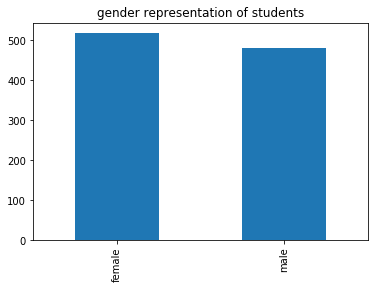

In [8]:
# bar chart of gender representation
gender_bars = students_performance['gender'].value_counts().plot.bar(title = 'gender representation of students')
plt.show()

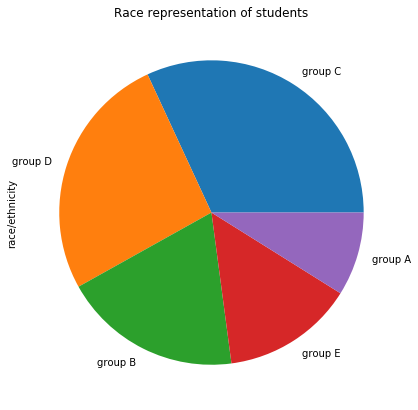

In [9]:
# bar charts of race/ethnicity representation
race_bars = students_performance['race/ethnicity'].value_counts().plot.pie(title = 'Race representation of students',
                                                                           figsize = (8, 7))
plt.show()

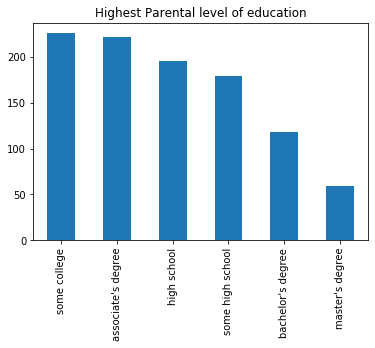

In [10]:
# bar chart of parental level of education (ploe)
ploe_bar = students_performance['parental level of education'].value_counts().plot.bar(title = 
                                                                                   'Highest Parental level of education')
plt.show()

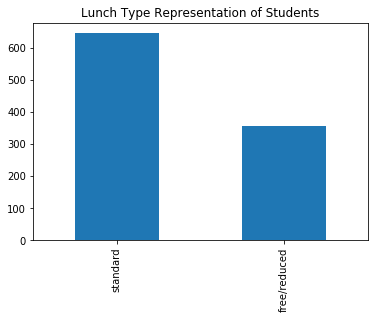

In [11]:
# bar chart for student's lunch type
lunch_bar = students_performance['lunch'].value_counts().plot.bar(title = 'Lunch Type Representation of Students')
plt.show()

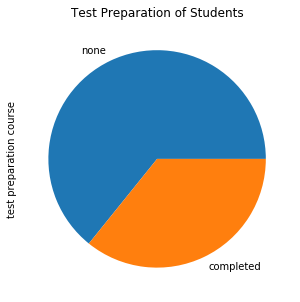

In [12]:
# bar chart of test preparation course
test_prep_bar = students_performance['test preparation course'].value_counts().plot.pie(title = 'Test Preparation of Students',
                                                                                       figsize = (6,5))
plt.show()

Next, we'll use histograms to view the distribution of test scores in `math_score`, `reading_score` and `writing_score`:

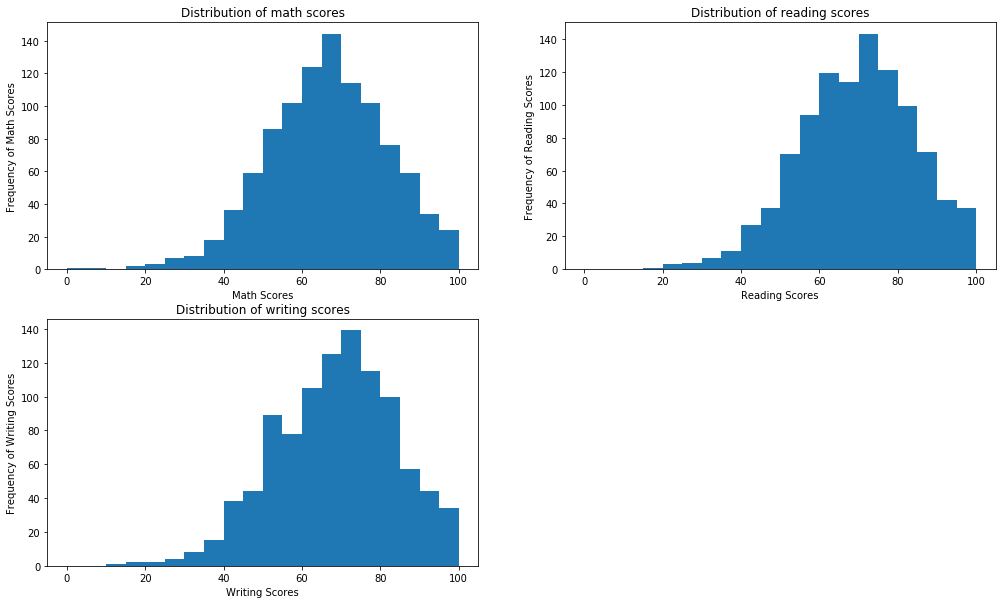

In [13]:
fig = plt.figure(figsize = (17, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)


ax1.hist(students_performance['math score'], range = (0, 100), bins = 20)
ax1.set_title('Distribution of math scores')
ax1.set_xlabel('Math Scores')
ax1.set_ylabel('Frequency of Math Scores')

ax2.hist(students_performance['reading score'], range = (0, 100), bins = 20)
ax2.set_title('Distribution of reading scores')
ax2.set_xlabel('Reading Scores')
ax2.set_ylabel('Frequency of Reading Scores')

ax3.hist(students_performance['writing score'], range = (0, 100), bins = 20)
ax3.set_title('Distribution of writing scores')
ax3.set_xlabel('Writing Scores')
ax3.set_ylabel('Frequency of Writing Scores')

plt.show()

The above chart shows the distribution of test scores accross the dataset.

From the above histograms, we can deduce the following:

- All plots are unimodal, indicating that the most occurin scores accross all tests lies between 60-80.
- Over 50% of students scored above 60 accross all tests
- Fewer number of students scored less than 20 in Reading test than accross the other two tests
- About 70% of scores fall between 50 - 100, suggesting that across all tests students generally performed above average.

##### 4. Create a new variable “average_score” represented from “math”, “reading” and “writing” scores.

Below, we create a new variable called `average_score` that aggregates the test scores for each student and finds their average.

In [14]:
# Create a new average_score column
students_performance['average_score'] = round((students_performance['math score'] + students_performance['reading score']
+ students_performance['writing score']) / 3, 2)

# check
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


##### 5. Create another variable “average_score_cat” that categorises the “average_score” using WAEC grading system.

In [15]:
# Create a function that follows the WAEC grading system
def waec_grade(row):
    if row >= 85:
        return 'A1'
    if (row >= 70) & (row < 85):
        return 'B2'
    if (row >= 65) & (row < 70):
        return 'B3'
    if (row >= 60) & (row < 65):
        return 'C4'
    if (row >= 55) & (row < 60):
        return 'C5'
    if (row >= 50) & (row < 55):
        return 'C6'
    if (row >= 45) & (row < 50):
        return 'D7'
    if (row >= 40) & (row < 45):
        return 'E8'
    elif row < 40:
        return 'F9'
    
# Apply the function on the 'average_score' column and create a new column from it called 'average_score_cat'
students_performance['average_score_cat'] = students_performance['average_score'].apply(waec_grade)

# check
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,average_score_cat
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,B2
1,female,group C,some college,standard,completed,69,90,88,82.33,B2
2,female,group B,master's degree,standard,none,90,95,93,92.67,A1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,D7
4,male,group C,some college,standard,none,76,78,75,76.33,B2


##### 6. Find a relationship (if any) between each variable and the new variable “average_score_cat”.

We'll do this only for the continous variables.

In [16]:
# find correlations
students_performance.corr()

,math score,reading score,writing score,average_score
math score,1.000000,0.817580,0.802642,0.918744
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965669
average_score,0.918744,0.970331,0.965669,1.000000


The above output shows the correlations between the test scores (`math score`, `reading score`, `writing score` and `average score`).

The correlation coefficients shows that there is a very high positive relationship amongst all continous variables.

##### 7. Create graphical representation of the relationship(s) discovered in 6.

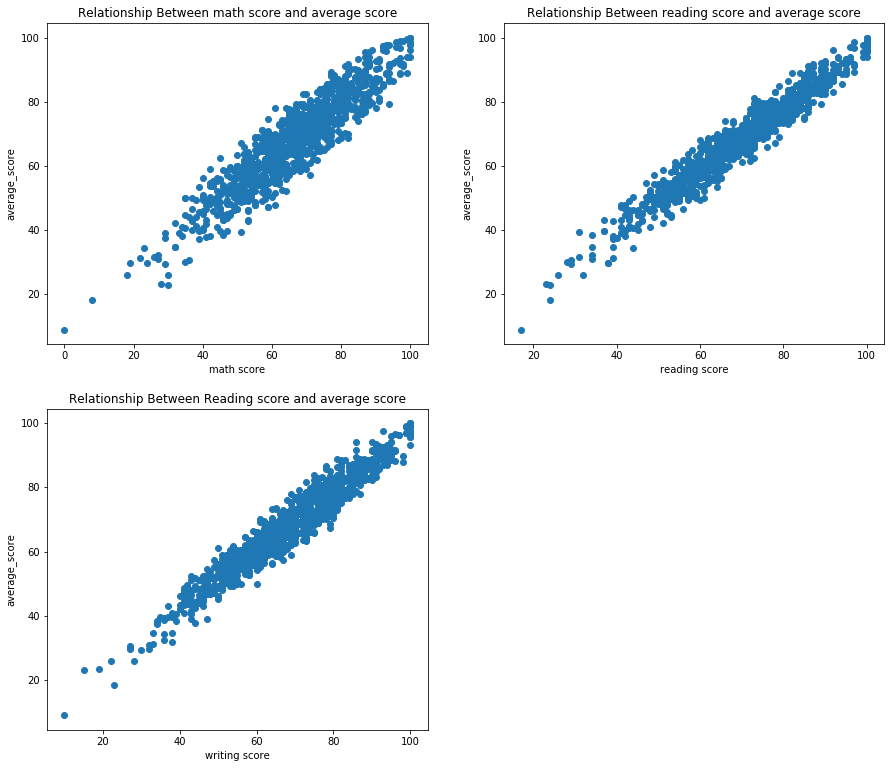

In [17]:
fig = plt.figure(figsize = (15, 13))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# Math - Reading relationship
ax1.scatter(students_performance['math score'], students_performance['average_score'])
ax1.set_xlabel('math score')
ax1.set_ylabel('average_score')
ax1.set_title('Relationship Between math score and average score')

# Math - Writing relationship
ax2.scatter(students_performance['reading score'], students_performance['average_score'])
ax2.set_xlabel('reading score')
ax2.set_ylabel('average_score')
ax2.set_title('Relationship Between reading score and average score')

# Reading - Writing relationship
ax3.scatter(students_performance['writing score'], students_performance['average_score'])
ax3.set_xlabel('writing score')
ax3.set_ylabel('average_score')
ax3.set_title('Relationship Between Reading score and average score')

plt.show()

The above charts show the correlations between `average_score` and all the other test scores.

##### 8. Develop an hypothesis about which variables that can help predict the “average_score_cat” of a new student.

In [18]:
students_performance[(students_performance['math score'] == 100) &
                     (students_performance['reading score'] == 100) &
                    (students_performance['writing score'] == 100)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,average_score_cat
458,female,group E,bachelor's degree,standard,none,100,100,100,100.0,A1
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.0,A1
962,female,group E,associate's degree,standard,none,100,100,100,100.0,A1


The above output shows students who scored `100` accross all tests. From the output above, we can generate a hypothesis that:

**HO:**  On the average, `female` students who are from `group E` ethnicity, whose parental level of education is `bachelor's degree`, who had `standard` and who did not complete the test preparation course are more likely to score `A1` using the WAEC grading system.